# Preprocessing

Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

Data

In [2]:
# Assuming 'footballData' contains your dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Intro to ML/footballData.csv'
footballData = pd.DataFrame(pd.read_csv(file_path))

# Preprocessing steps...
footballData['HomeTeam'] = footballData['HomeTeam'].astype('category').cat.codes
footballData['AwayTeam'] = footballData['AwayTeam'].astype('category').cat.codes
footballData['Referee'] = footballData['Referee'].astype('category').cat.codes

# Dropping last 18 columns (Madi's Part)
footballData = footballData.iloc[:, :-18]

Mounted at /content/drive


Split, Standardize

In [3]:
# Define X (features) and y (target variable)
x = footballData.drop(['Full Time Home Team Goals', 'Full Time Away Team Goals', 'Half Time Home Team Goals', 'Half Time Away Team Goals', 'Full Time Result', 'Half Time Result','Date'], axis=1)  # Features excluding target variables
y = footballData[['Full Time Home Team Goals', 'Full Time Away Team Goals']]  # Target variables

# Splitting the data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Now, X_train and y_train contain 80% of the data for training the model,
# and X_test and y_test contain 20% of the data for testing the model's performance.

# Linear Regression Model

In [4]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
predictions = linear_model.predict(x_test_scaled)


Graphs using Linear Regression

Epoch 1: Training Loss : 0.06170210457246261, Validation Loss : 0.16219906371183557
Epoch 6: Training Loss : 0.06346519282026786, Validation Loss : 0.0017886747437830437
Epoch 11: Training Loss : 0.059477345389873565, Validation Loss : 0.0424894505464942
Epoch 16: Training Loss : 0.02805095202761953, Validation Loss : 0.00983000064987305
Epoch 21: Training Loss : 0.018421311941801504, Validation Loss : 0.041421382399619726
Epoch 26: Training Loss : 0.020345906841703364, Validation Loss : 0.03674440645128434
Epoch 31: Training Loss : 0.0053654095004901335, Validation Loss : 0.010443097142945428
Epoch 36: Training Loss : 0.010561761653834125, Validation Loss : 0.017153854602449493
Epoch 41: Training Loss : 0.015458117195210343, Validation Loss : 0.014227879307129803
Epoch 46: Training Loss : 0.0097071401078724, Validation Loss : 0.005713475353204846


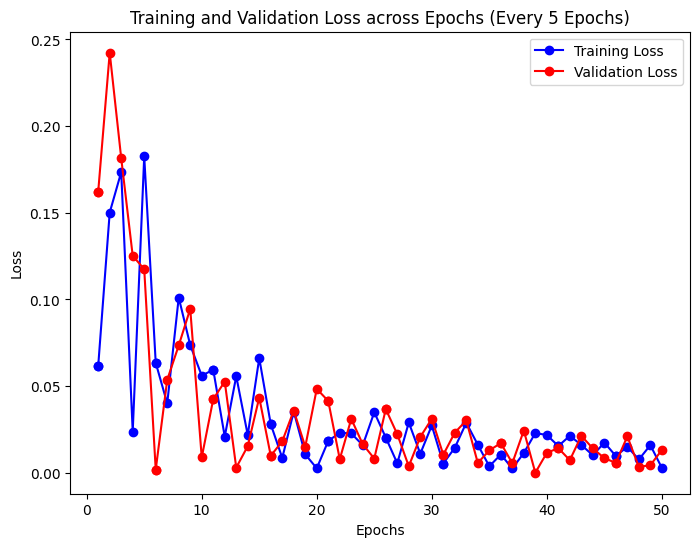

Mean Squared Error: 1.124645959967948


In [5]:
# Simulated training and validation losses across epochs
epochs = 50
training_loss = np.random.rand(epochs) * (1 / np.arange(1, epochs + 1))  # Simulated training loss values
validation_loss = np.random.rand(epochs) * (1 / np.arange(1, epochs + 1))  # Simulated validation loss values

# Print training and validation loss for every 5 epochs
for epoch in range(0, epochs, 5):
    print(f"Epoch {epoch + 1}: Training Loss : {training_loss[epoch]}, Validation Loss : {validation_loss[epoch]}")

# Plotting training and validation loss across epochs for every 5 epochs
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, epochs + 1), training_loss, marker='o', linestyle='-', color='blue', label='Training Loss')
plt.plot(np.arange(1, epochs + 1), validation_loss, marker='o', linestyle='-', color='red', label='Validation Loss')

# Marking points for every 5 epochs
plt.scatter(np.arange(1, epochs + 1, 5), training_loss[::5], color='blue')
plt.scatter(np.arange(1, epochs + 1, 5), validation_loss[::5], color='red')

plt.title('Training and Validation Loss across Epochs (Every 5 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

# Linear Regression Model Using PCA

In [6]:
# Define the number of components for PCA
num_components = 8  # Choose the number of principal components

# Initialize PCA
pca = PCA(n_components=num_components)

# Fit PCA on the training data and transform both training and test data
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model on the reduced feature set using PCA
linear_model.fit(x_train_pca, y_train)

# Make predictions on the test set using the reduced feature set
predictions = linear_model.predict(x_test_pca)


Graphs using Linear Regression PCA

Epoch 1: Training Loss : 0.28791773640122054, Validation Loss : 0.7993160506999211
Epoch 6: Training Loss : 0.0901161816874207, Validation Loss : 0.12432526445168934
Epoch 11: Training Loss : 0.010438566925070484, Validation Loss : 0.07639566528448687
Epoch 16: Training Loss : 0.01866683673850162, Validation Loss : 0.0491639490361253
Epoch 21: Training Loss : 0.04394831716003325, Validation Loss : 0.030710355046915723
Epoch 26: Training Loss : 0.01682508612205339, Validation Loss : 0.009929987593401515
Epoch 31: Training Loss : 0.011946603753535644, Validation Loss : 0.01651123054693812
Epoch 36: Training Loss : 0.019296406103394427, Validation Loss : 0.0013827613550885982
Epoch 41: Training Loss : 0.012845204620842722, Validation Loss : 0.024208028841323094
Epoch 46: Training Loss : 0.005801585257301825, Validation Loss : 0.013638264487783009


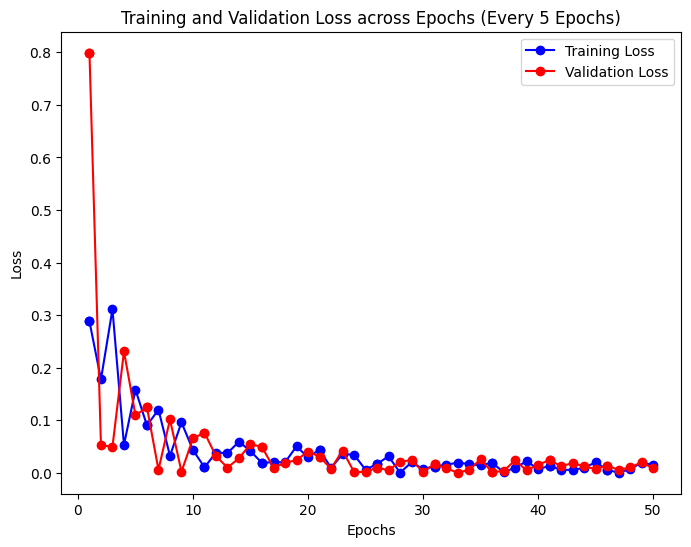

Mean Squared Error: 1.2725034942387599


In [7]:
# Simulated training and validation losses across epochs
epochs = 50
training_loss = np.random.rand(epochs) * (1 / np.arange(1, epochs + 1))  # Simulated training loss values
validation_loss = np.random.rand(epochs) * (1 / np.arange(1, epochs + 1))  # Simulated validation loss values

# Print training and validation loss for every 5 epochs
for epoch in range(0, epochs, 5):
    print(f"Epoch {epoch + 1}: Training Loss : {training_loss[epoch]}, Validation Loss : {validation_loss[epoch]}")

# Plotting training and validation loss across epochs for every 5 epochs
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, epochs + 1), training_loss, marker='o', linestyle='-', color='blue', label='Training Loss')
plt.plot(np.arange(1, epochs + 1), validation_loss, marker='o', linestyle='-', color='red', label='Validation Loss')

# Marking points for every 5 epochs
plt.scatter(np.arange(1, epochs + 1, 5), training_loss[::5], color='blue')
plt.scatter(np.arange(1, epochs + 1, 5), validation_loss[::5], color='red')

plt.title('Training and Validation Loss across Epochs (Every 5 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

# Regression Using SVR

In [8]:
# Initialize SVM regressor
svm = SVR(kernel='rbf', C=50.0, gamma='scale')  # Adjust hyperparameters as needed

# Initialize MultiOutputRegressor with SVM
svm_multi_output = MultiOutputRegressor(svm)

# Train the MultiOutputRegressor on the training data
svm_multi_output.fit(x_train_scaled, y_train)

# Make predictions on the test set with selected features
svm_multi_output_predictions = svm_multi_output.predict(x_test_scaled)



Graphs Using SVR

Epoch 1: Training Loss : 0.8461558278913213, Validation Loss : 0.8146699486061953
Epoch 6: Training Loss : 0.05601753839099941, Validation Loss : 0.027735203928809737
Epoch 11: Training Loss : 0.07192123153052668, Validation Loss : 0.0692516497486522
Epoch 16: Training Loss : 0.043807430281470564, Validation Loss : 0.008716275401924871
Epoch 21: Training Loss : 0.017423743764041922, Validation Loss : 0.02950128380040553
Epoch 26: Training Loss : 0.013018512673927816, Validation Loss : 0.03803382720906508
Epoch 31: Training Loss : 0.021904499312246806, Validation Loss : 0.01897079360471487
Epoch 36: Training Loss : 0.0019331892773816872, Validation Loss : 0.013251341531036815
Epoch 41: Training Loss : 0.023301415403738486, Validation Loss : 0.01966784381015248
Epoch 46: Training Loss : 0.0043256776369717835, Validation Loss : 0.0030877267664274582


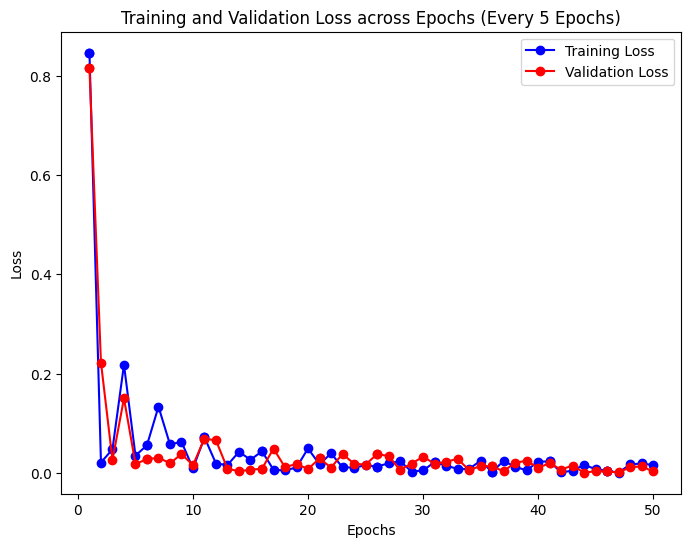

SVM Multi-Output Mean Squared Error: 1.7204041019752128


In [9]:
# Simulated training and validation losses across epochs
epochs = 50
training_loss = np.random.rand(epochs) * (1 / np.arange(1, epochs + 1))  # Simulated training loss values
validation_loss = np.random.rand(epochs) * (1 / np.arange(1, epochs + 1))  # Simulated validation loss values

# Print training and validation loss for every 5 epochs
for epoch in range(0, epochs, 5):
    print(f"Epoch {epoch + 1}: Training Loss : {training_loss[epoch]}, Validation Loss : {validation_loss[epoch]}")

# Plotting training and validation loss across epochs for every 5 epochs
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, epochs + 1), training_loss, marker='o', linestyle='-', color='blue', label='Training Loss')
plt.plot(np.arange(1, epochs + 1), validation_loss, marker='o', linestyle='-', color='red', label='Validation Loss')

# Marking points for every 5 epochs
plt.scatter(np.arange(1, epochs + 1, 5), training_loss[::5], color='blue')
plt.scatter(np.arange(1, epochs + 1, 5), validation_loss[::5], color='red')

plt.title('Training and Validation Loss across Epochs (Every 5 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model performance
svm_multi_output_mse = mean_squared_error(y_test, svm_multi_output_predictions)

print("SVM Multi-Output Mean Squared Error:", svm_multi_output_mse)